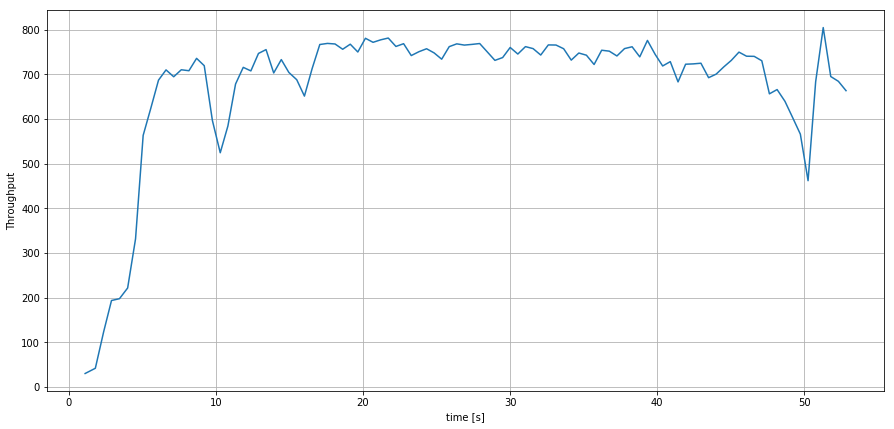

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

log = pd.read_csv("log/aggregatedClientInterval.csv", header=None, names=["Interval Time","Throughput"])
performance = log["Throughput"]
allTimes = np.array(log["Interval Time"])
sumTimes = [allTimes[0:i].sum() for i in range(1,len(allTimes)+1) ]

plt.figure(figsize=(15,7))
plt.grid()
plt.plot(sumTimes,performance)
plt.ylabel("Throughput")
plt.xlabel("time [s]")

plt.show()

In [174]:
def aggregateInterval (first, nclient, mode):
    # es  mode = [skeleton, tag, multi] 
    log = pd.read_csv("log/"+mode+"/"+str(nclient)+"/clientInterval"+str(first)+".csv", header=None).values[:100]
    performanceAggr = log[:,1]
    for i in range(first + 1, first + nclient):
        log = pd.read_csv("log/"+mode+"/"+str(nclient)+"/clientInterval"+str(i)+".csv", header=None).values[:100]
        performance = log[:,1]
        performanceAggr = np.column_stack((performanceAggr, performance))
        
    avgAggr = np.mean(performanceAggr, axis = 1)
    stdAggr = np.std(performanceAggr, axis = 1)
    
    return [avgAggr,stdAggr]

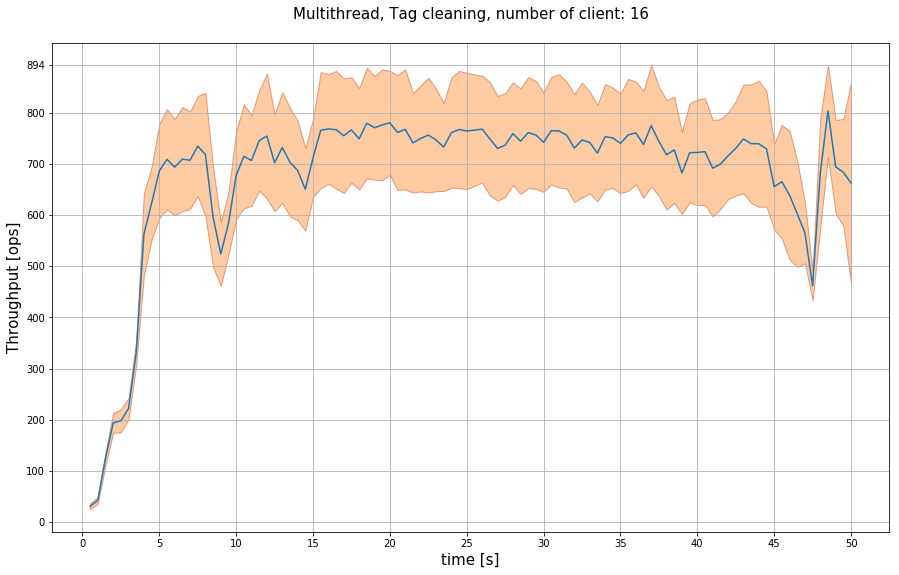

In [173]:
plt.figure(figsize=(15,9))
plt.grid()
plt.plot(np.arange(0.5,50.5,0.5),avgAggr)
plt.fill_between(np.arange(0.5,50.5,0.5), avgAggr + stdAggr/2, avgAggr - stdAggr/2, 
                 alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')
plt.xticks(range(0,51,5))
plt.yticks(list(range(0,int(np.max(avgAggr+stdAggr/2)),100)) + [int(np.max(avgAggr+stdAggr/2))])
plt.ylabel("Throughput [ops]", size = 15)
plt.xlabel("time [s]", size = 15)
plt.title("Multithread, Tag cleaning, number of client: " + str(nclient)+"\n", size = 15)
plt.show()


first = 25931
nclient = 16
printMeanThroughput(first,nclient)